本次分析了一次考试的分科成绩的分布，和男生女生在各科成绩上的差异表现。

In [58]:
%pylab inline
%matplotlib inline
import excel_op as exl 
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [59]:
# db9 = exl.open_excel(r'.\data\test_data\ThirdYear9.xlsx')
# db10 = exl.open_excel(r'.\data\test_data\ThirdYear10.xlsx')
# db11 = exl.open_excel(r'.\data\test_data\ThirdYear11.xlsx')
# #db.get_data( 0, 3, 3)#第一个表第四行第四列
#db.get_row(0,3)第一个表第四行
#db.get_col(0,0)第一个表第一列

载入数据：

In [60]:

file_path = r'.\data\test_data\ThirdYear'
db = list()
for i in range(3):
    db.append(pd.read_excel(file_path+str(i+9)+'.xlsx',sheetname=[0],header=0)[0])

数据载入展示一下：

In [63]:
print(db[1].shape)
db[1].head()

(1173, 32)


,班级,姓名,考号,语文,数学,英语,物理,化学,生物,政治,...,语文.2,数学.2,英语.2,物理.2,化学.2,生物.2,政治.2,历史.2,地理.2,10月份月考
0,2.0,戴志鹏,101.0,103.0,74.0,102.5,NaN,NaN,NaN,65.0,...,21.0,30.0,76.5,NaN,NaN,NaN,38.0,40.0,44.0,NaN
1,1.0,韩梦圆,102.0,103.0,92.0,69.0,NaN,NaN,NaN,66.0,...,21.0,30.0,49.0,NaN,NaN,NaN,38.0,28.0,40.0,NaN
2,3.0,汪梓龙,103.0,99.0,80.0,116.5,NaN,NaN,NaN,63.0,...,21.0,35.0,79.5,NaN,NaN,NaN,34.0,32.0,44.0,NaN
3,5.0,李伟,104.0,101.0,96.0,125.5,NaN,NaN,NaN,67.0,...,21.0,45.0,84.5,NaN,NaN,NaN,42.0,28.0,46.0,NaN
4,6.0,余乐,105.0,96.0,83.0,118.5,NaN,NaN,NaN,69.0,...,18.0,40.0,80.5,NaN,NaN,NaN,38.0,30.0,42.0,NaN


提取数据，只用到每个Excel表的第一页中1-12列，即班级-姓名-考号-语文-数学-。。。-文理

In [64]:
data = list()
for i in range(len(db)):
    data.append(db[i].iloc[:db[i].shape[0],0:13])
    

In [66]:
print(data[2].shape)
data[1].head()

(1174, 13)


,班级,姓名,考号,语文,数学,英语,物理,化学,生物,政治,历史,地理,文理
0,2.0,戴志鹏,101.0,103.0,74.0,102.5,NaN,NaN,NaN,65.0,71.0,71.0,文科
1,1.0,韩梦圆,102.0,103.0,92.0,69.0,NaN,NaN,NaN,66.0,61.0,58.0,文科
2,3.0,汪梓龙,103.0,99.0,80.0,116.5,NaN,NaN,NaN,63.0,63.0,65.0,文科
3,5.0,李伟,104.0,101.0,96.0,125.5,NaN,NaN,NaN,67.0,59.0,77.0,文科
4,6.0,余乐,105.0,96.0,83.0,118.5,NaN,NaN,NaN,69.0,57.0,64.0,文科


从下图可以看出，语文分布比较集中，数学和英语成绩分布比较散

语文第一次


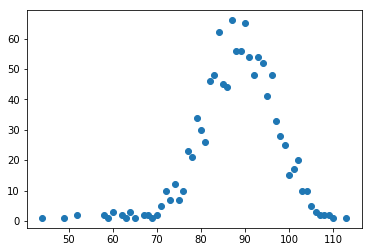

语文第二次


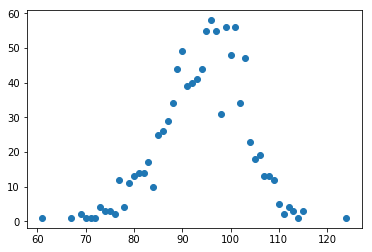

语文第三次


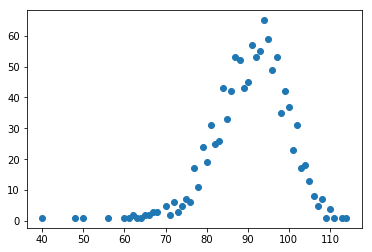

数学第一次


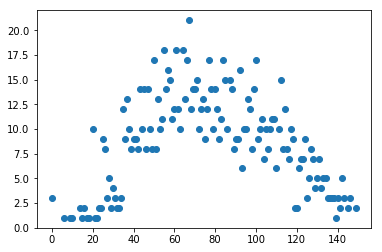

数学第二次


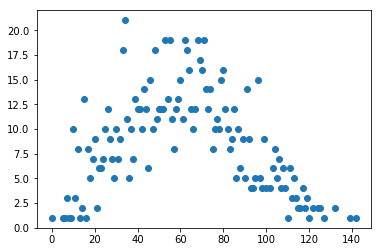

数学第三次


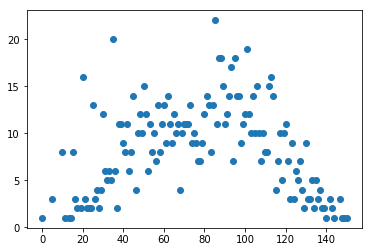

英语第一次


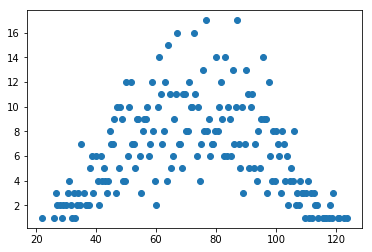

英语第二次


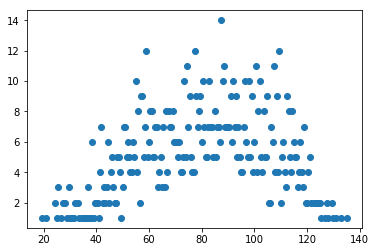

英语第三次


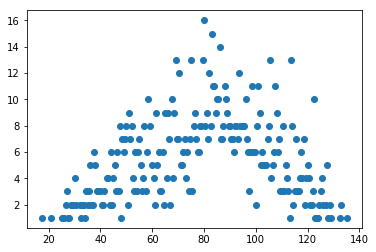

In [77]:
def show_distributed(i = 0, project = "语文"):
    d = data[i][project].value_counts().to_dict()
    r = []
    for key, value in d.items():
        r.append([key, value])
    r = np.array(r)
    plt.scatter(r[:,0], r[:,1])
    plt.show()
print("语文第一次")
show_distributed()
print("语文第二次")
show_distributed(i = 1)
print("语文第三次")
show_distributed(i = 2)

print("数学第一次")
show_distributed(i= 0, project = "数学")
print("数学第二次")
show_distributed(i= 1, project = "数学")
print("数学第三次")
show_distributed(i= 2, project = "数学")

print("英语第一次")
show_distributed(i= 0, project = "英语")
print("英语第二次")
show_distributed(i= 1, project = "英语")
print("英语第三次")
show_distributed(i= 2, project = "英语")

以下是使用成绩预测性别，探讨性别和成绩特征的关系。性别特征是手动标注，选取明显能区分男女的名字标注，抛弃不能区分男女的信息，所以数据量比较小，只做探讨。

In [78]:
import pandas as pd
file_path = r'.\data\test_data\ThirdYear_test.xlsx'
df = pd.read_excel(file_path, sheetname=[0],header=0)[0]

选取225个数据点，男生118个。

In [79]:
data = df.iloc[:714,1:10]
data.columns=['name','sex','num','chinese','math','english','Physical', 'chemical', 'organisms']
data = data[['sex','chinese','math','english','Physical', 'chemical', 'organisms']]
data = data[data.sex >0]
data[['sex']] = data[['sex']].astype(int)
print(data.shape)
man_num = 0
c = data.loc[:,['sex']]

for i in c['sex']:
    
    if i == 1:
        man_num += 1
print(man_num)
data.head()


(225, 7)
118


,sex,chinese,math,english,Physical,chemical,organisms
1,1,92.0,111.0,54.0,70.0,74.0,86.0
2,1,90.0,36.0,35.0,29.0,28.0,44.0
4,1,82.0,86.0,55.5,38.0,39.0,75.0
6,2,74.0,47.0,90.5,26.0,31.0,69.0
9,1,98.0,103.0,73.5,57.0,80.0,81.0


pca降维：

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
data = data.fillna(data.mean())
value = data.iloc[:,1:].values

new_value = pca.fit_transform(value)
new_value.shape

(225, 3)

从下图看出男女生成绩分布有一定规律，但是并不是那么明显。

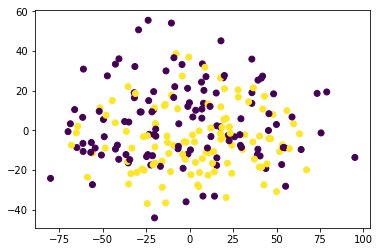

In [81]:
import matplotlib  
import matplotlib.pyplot as plt 

plt.figure()
plt.scatter(new_value[:,0],new_value[:,1], c=data.iloc[:,0])
plt.show()

三维图，也不是很清晰

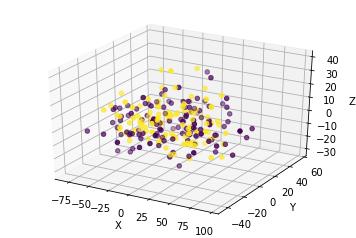

In [82]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

ax=plt.subplot(111,projection='3d') #创建一个三维的绘图工程

#将数据点分成三部分画，在颜色上有区分度
ax.scatter(new_value[:,0],new_value[:,1],new_value[:,2],c=data.iloc[:,0]) #绘制数据点


ax.set_zlabel('Z')
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

下面使用pca+svm，使用成绩作为特征，性别作为标签，分类上述数据。使用GridSearchCV调参。从下面分析看出，分类男女的效果最好在0.66左右，比随机猜测0.5要好一点，但是并没有很好的效果，证明男女生理科成绩有一定差异，但是不明显。

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

X = data.iloc[:,1:].values
y = data.iloc[:,0].values

pca = PCA()

svm = SVC()

pipeline = Pipeline([("pca", pca), ("svm", svm)])

param_grid = dict(pca__n_components=[1, 2, 3],
                  svm__kernel=['linear', 'rbf'],
                  svm__C=[0.05,0.1,0.5, 1, 10],
                  svm__gamma = [0.1,0.2,0.3])

grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=10)
grid_search.fit(X, y)
print(grid_search.best_estimator_)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV] pca__n_components=1, svm__kernel=linear, svm__gamma=0.1, svm__C=0.05 
[CV]  pca__n_components=1, svm__kernel=linear, svm__gamma=0.1, svm__C=0.05, score=0.513158, total=   0.0s
[CV] pca__n_components=1, svm__kernel=linear, svm__gamma=0.1, svm__C=0.05 
[CV]  pca__n_components=1, svm__kernel=linear, svm__gamma=0.1, svm__C=0.05, score=0.520000, total=   0.0s
[CV] pca__n_components=1, svm__kernel=linear, svm__gamma=0.1, svm__C=0.05 
[CV]  pca__n_components=1, svm__kernel=linear, svm__gamma=0.1, svm__C=0.05, score=0.500000, total=   0.0s
[CV] pca__n_components=1, svm__kernel=rbf, svm__gamma=0.1, svm__C=0.05 
[CV]  pca__n_components=1, svm__kernel=rbf, svm__gamma=0.1, svm__C=0.05, score=0.526316, total=   0.0s
[CV] pca__n_components=1, svm__kernel=rbf, svm__gamma=0.1, svm__C=0.05 
[CV]  pca__n_components=1, svm__kernel=rbf, svm__gamma=0.1, svm__C=0.05, score=0.520000, total=   0.0s
[CV] pca__n_components=1, svm__kernel=rbf, sv

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s


[CV]  pca__n_components=1, svm__kernel=linear, svm__gamma=0.3, svm__C=0.1, score=0.513158, total=   0.0s
[CV] pca__n_components=1, svm__kernel=linear, svm__gamma=0.3, svm__C=0.1 
[CV]  pca__n_components=1, svm__kernel=linear, svm__gamma=0.3, svm__C=0.1, score=0.520000, total=   0.0s
[CV] pca__n_components=1, svm__kernel=linear, svm__gamma=0.3, svm__C=0.1 
[CV]  pca__n_components=1, svm__kernel=linear, svm__gamma=0.3, svm__C=0.1, score=0.500000, total=   0.0s
[CV] pca__n_components=1, svm__kernel=rbf, svm__gamma=0.3, svm__C=0.1 
[CV]  pca__n_components=1, svm__kernel=rbf, svm__gamma=0.3, svm__C=0.1, score=0.526316, total=   0.0s
[CV] pca__n_components=1, svm__kernel=rbf, svm__gamma=0.3, svm__C=0.1 
[CV]  pca__n_components=1, svm__kernel=rbf, svm__gamma=0.3, svm__C=0.1, score=0.520000, total=   0.0s
[CV] pca__n_components=1, svm__kernel=rbf, svm__gamma=0.3, svm__C=0.1 
[CV]  pca__n_components=1, svm__kernel=rbf, svm__gamma=0.3, svm__C=0.1, score=0.527027, total=   0.0s
[CV] pca__n_compon

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:   32.2s finished
